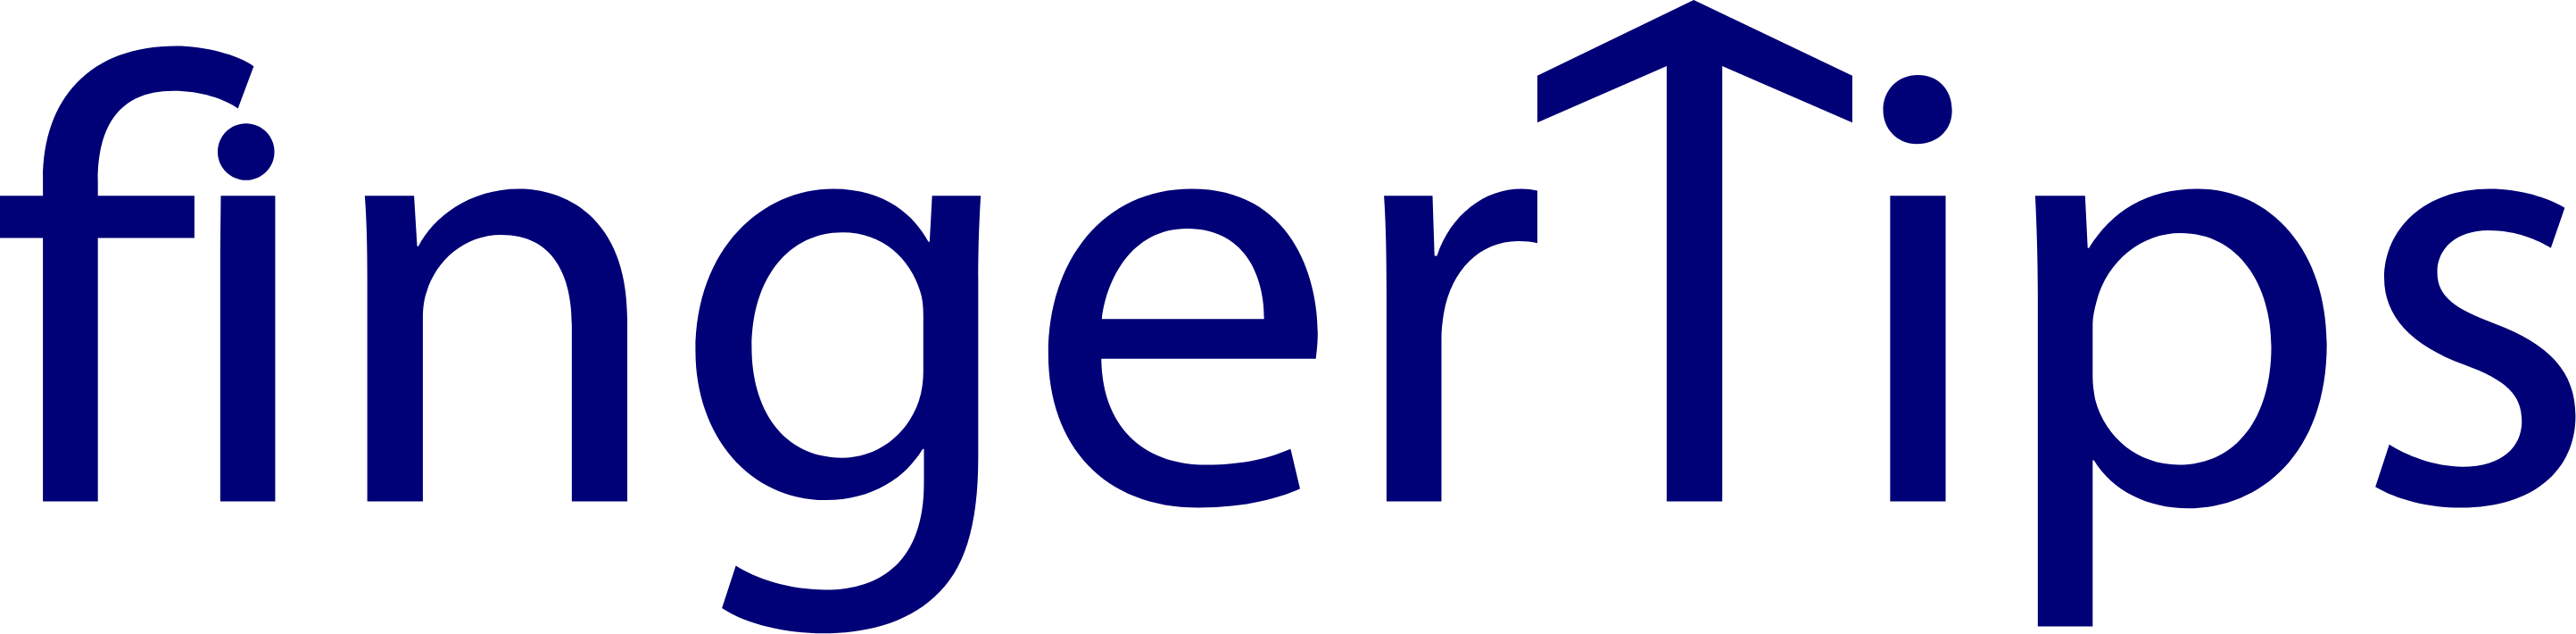

## Bank Marketing
### Abstract:
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

### Data Set Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

### Attribute Information:
#### Bank client data:
1. Age (numeric)
1. Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
2. Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
3. Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
4. Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
5. Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
6. Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
#### Related with the last contact of the current campaign:
7. Contact: contact communication type (categorical:'cellular','telephone')
8. Month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')
9. Day_of_week: last contact day of the week (categorical:'mon','tue','wed','thu','fri')
10. Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). 
Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### Other attributes:
11. Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
12. Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
13. Previous: number of contacts performed before this campaign and for this client (numeric)
14. Poutcome: outcome of the previous marketing campaign (categorical:'failure','nonexistent','success')
#### Social and economic context attributes
15. Emp.var.rate: employment variation rate - quarterly indicator (numeric)
16. Cons.price.idx: consumer price index - monthly indicator (numeric)
17. Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
18. Euribor3m: euribor 3 month rate - daily indicator (numeric)
19. Nr.employed: number of employees - quarterly indicator (numeric)
#### Output variable (desired target):
20. y - has the client subscribed a term deposit? (binary: 'yes', 'no')
#### Analysis Steps:
Atribute information Analysis.
Machine Learning (Logistic Regression, KNN, SVM, Decision Tree, Random Forest, Naive Bayes)

## Algorithms Covered:
1. Logistic Regression
2. Naive Bayes
3. Support Vector Classifier
4. Decision Tree Classifier
5. Random Forest Classifier
6. K Nearest Neighbour

## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Importing Dataset

In [2]:
data_path="Bank Marketing Dataset.csv"
df=pd.read_csv(data_path,sep=";")
pd.set_option("display.max_columns", None) #to get all the columns of dataframe
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2451,38,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,tue,173,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
23431,50,unemployed,married,basic.9y,unknown,no,yes,cellular,aug,wed,88,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
10266,28,admin.,single,university.degree,no,no,no,telephone,jun,mon,78,5,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,no
10385,41,blue-collar,divorced,basic.9y,unknown,no,no,telephone,jun,mon,294,3,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,no
21029,31,admin.,single,university.degree,no,yes,yes,cellular,aug,thu,337,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
28497,56,management,married,basic.9y,unknown,no,no,cellular,apr,tue,584,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
7976,45,technician,married,university.degree,no,no,no,telephone,jun,mon,79,3,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
14951,26,technician,single,professional.course,no,no,yes,cellular,jul,wed,168,2,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no
38760,40,services,married,high.school,no,yes,no,cellular,nov,thu,90,3,3,2,success,-3.4,92.649,-30.1,0.714,5017.5,yes
12089,30,blue-collar,single,basic.6y,unknown,yes,no,telephone,jun,fri,169,2,999,0,nonexistent,1.4,94.465,-41.8,4.947,5228.1,no


### General Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Features of dataset

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
len(df.columns)

21

### Separating Numerical & Categorical features

In [6]:
#categorical features
cat_fea = [col for col in df.columns if df[col].dtype=='O']

#numerical features
num_fea = [col for col in df.columns if df[col].dtype!='O']

print(cat_fea)
print(num_fea)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


### Duplicates

In [7]:
df.duplicated().sum()

12

In [8]:
#Drop duplicates

df = df.drop_duplicates()

### Value-counts for Categorical features

In [9]:
for col in cat_fea:
    print(f'{col}\n{df[col].value_counts()}\n')

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

marital
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

default
no         32577
unknown     8596
yes            3
Name: default, dtype: int64

housing
yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

loan
no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

contact
cellular     26135
telephone    15041
Name: con

### Null Values

In [10]:
df.shape

(41176, 21)

In [11]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### There are no null values in the dataset

In [12]:
#'default' feature
df['default'].value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

In [13]:
#null values are in the form of 'unknown'

for col in df.columns:
    df[col].replace('unknown', np.nan, inplace=True)
    df.dropna(inplace=True)

#### Since default feature is mostly "no" which is highly imbalanced, so we will drop this feature.

In [14]:
#drop 'deafult' feature
df.drop('default', inplace=True,axis=1)

In [15]:
#'education' feature
df['education'].value_counts()

university.degree      10408
high.school             7697
professional.course     4318
basic.9y                4276
basic.4y                2380
basic.6y                1388
illiterate                11
Name: education, dtype: int64

#### For education feature, there are some similar values like basic.9y, basic.6y and basic.4y. So, we will convert them to "middle.shool"

In [16]:
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    df.loc[df['education'] == i, 'education'] = "middle.school"

df['education'].value_counts()

university.degree      10408
middle.school           8044
high.school             7697
professional.course     4318
illiterate                11
Name: education, dtype: int64

In [17]:
df.poutcome.value_counts()

nonexistent    25826
failure         3461
success         1191
Name: poutcome, dtype: int64

#### In poutcome feature, there is a problem with missing value(nonexistent), but since it is too much data, we will convert them to 0.

In [18]:
df.poutcome = df.poutcome.map({'nonexistent':0, 'failure':0, 'success':1})

In [19]:
df.shape

(30478, 20)

In [20]:
df.tail()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,yes,no,cellular,nov,fri,239,3,999,1,0,-1.1,94.767,-50.8,1.028,4963.6,no


In [21]:
#reseting index

df.reset_index(inplace=True,drop=True)
df.tail()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
30473,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes
30474,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
30475,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
30476,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes
30477,74,retired,married,professional.course,yes,no,cellular,nov,fri,239,3,999,1,0,-1.1,94.767,-50.8,1.028,4963.6,no


### Statistical Description

In [22]:
df.describe()

,age,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000
mean,39.029694,259.513124,2.521721,956.318295,0.194337,0.039077,-0.071425,93.523376,-40.602579,3.459976,5160.813967
std,10.332746,261.746393,2.720495,201.404843,0.522862,0.193782,1.610306,0.585366,4.788790,1.777215,75.158267
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,103.000000,1.000000,999.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,181.000000,2.000000,999.000000,0.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,45.000000,321.000000,3.000000,999.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,4918.000000,43.000000,999.000000,7.000000,1.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [23]:
#'pdays' feature
df.pdays.value_counts()

999    29168
3        381
6        363
4        102
2         53
9         53
7         50
12        50
5         43
10        40
13        33
11        25
15        22
1         21
14        17
0         14
8         13
16         8
17         6
18         5
22         3
19         3
21         2
25         1
26         1
27         1
Name: pdays, dtype: int64

#### There is also a issue in pdays feature, if the value is 999, then it will be replaced with a 0 which means that the client was not previously contacted.

In [24]:
df.loc[df['pdays'] == 999, 'pdays'] = 0

In [25]:
df.pdays.value_counts()

0     29182
3       381
6       363
4       102
2        53
9        53
7        50
12       50
5        43
10       40
13       33
11       25
15       22
1        21
14       17
8        13
16        8
17        6
18        5
22        3
19        3
21        2
25        1
26        1
27        1
Name: pdays, dtype: int64

In [26]:
# Convert target variable into numeric
df.y = df.y.map({'no':0, 'yes':1})

### Heatmap to check correlation

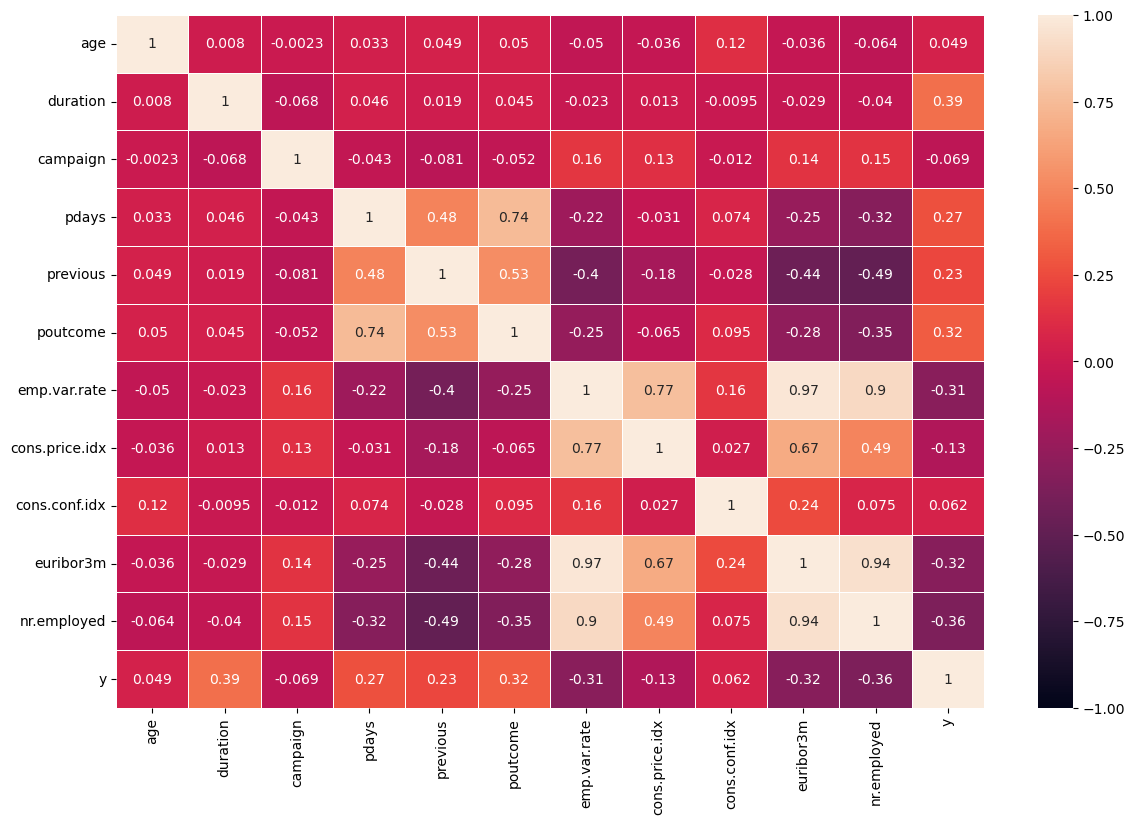

In [27]:
fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, linewidths=.5)
plt.show()

#### Since 'pdays' and 'previous' features are correlated, so we will convert 'previous' feature to categorical feature.

In [28]:
df.previous = df.previous.apply(lambda x: 1 if x > 0 else 0)

In [29]:
df.sample(5)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
16729,52,admin.,married,middle.school,yes,yes,cellular,nov,mon,102,3,0,0,0,-0.1,93.200,-42.0,4.191,5195.8,0
18928,45,admin.,divorced,university.degree,yes,no,cellular,nov,fri,164,1,0,1,0,-0.1,93.200,-42.0,4.021,5195.8,0
23011,31,management,married,university.degree,no,no,cellular,may,fri,238,1,0,1,0,-1.8,92.893,-46.2,1.313,5099.1,0
20431,37,admin.,married,high.school,yes,yes,cellular,apr,fri,171,1,0,1,0,-1.8,93.075,-47.1,1.405,5099.1,0
15212,35,technician,married,professional.course,no,yes,cellular,aug,mon,463,2,0,0,0,1.4,93.444,-36.1,4.965,5228.1,0


#### Encoding features

In [30]:
#encoding categorical features
le = preprocessing.LabelEncoder()
objects = ["job","marital","education","housing","loan","contact","month","day_of_week"]
for i in objects:  
    df[i] = le.fit_transform(df[i])

In [31]:
df.sample(7)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27831,26,9,2,4,1,0,0,8,2,152,1,0,0,0,-3.4,92.431,-26.9,0.754,5017.5,0
74,37,1,1,2,1,0,1,6,1,345,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
9645,21,0,2,0,1,0,0,3,4,680,1,0,0,0,1.4,93.918,-42.7,4.957,5228.1,0
30087,56,0,1,2,1,1,0,9,2,319,1,0,0,0,-1.1,94.199,-37.5,0.879,4963.6,1
17772,46,1,1,2,1,0,0,7,4,187,1,0,1,0,-0.1,93.200,-42.0,4.120,5195.8,0
17880,35,0,2,4,1,0,0,7,4,273,2,0,0,0,-0.1,93.200,-42.0,4.120,5195.8,0
25849,46,0,2,4,0,0,0,6,1,70,1,0,0,0,-1.8,92.893,-46.2,1.264,5099.1,0


### Model Building

In [32]:
#Data Splitting Libraries
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#Classification Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [33]:
X = df.drop(['y'], axis=1)
y = df.y
print("X Columns: ",list(X.columns))

X Columns:  ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [34]:
#Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [35]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Classification Algorithms

### 1. Logistic Regression

In [36]:
log = LogisticRegression()
log.fit(X_train, y_train)
pred_log = log.predict(X_test)
print(classification_report(y_test, pred_log))
print(f'{log} : {accuracy_score(y_test, pred_log)*100}') 

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6656
           1       0.67      0.39      0.49       964

    accuracy                           0.90      7620
   macro avg       0.79      0.68      0.72      7620
weighted avg       0.89      0.90      0.89      7620

LogisticRegression() : 89.86876640419948


#### Hyper parameter tuning on Logistic Regression Model using GridSearchCV

In [37]:
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# Initialize the grid search
grid_search = GridSearchCV(log, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)
#print(grid_search.best_score_*100) #training accuracy
pred_log = grid_search.predict(X_test) 
print(f'{log} : {accuracy_score(y_test, pred_log)*100}') #test accuracy

{'C': 0.1, 'penalty': 'l2'}
LogisticRegression() : 89.81627296587926


#### It's possible that the test accuracy may decrease after hyperparameter tuning, even though the accuracy during cross-validation may have improved. This could occur for a few reasons:
1. Overfitting: The model may have been tuned to perform well on the training data, but may not generalize well to new, unseen data.
2. High Variance: If the model is sensitive to the noise in the data and the tuning process increases the model's complexity, it may lead to overfitting and decrease in test accuracy.

### 2. Naive Bayes

In [38]:
NB = GaussianNB()
NB.fit(X_train, y_train)
pred_NB = NB.predict(X_test)
print(classification_report(y_test, pred_NB))
print(f'{NB} : {accuracy_score(y_test, pred_NB)*100}') 

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      6656
           1       0.46      0.53      0.49       964

    accuracy                           0.86      7620
   macro avg       0.70      0.72      0.71      7620
weighted avg       0.87      0.86      0.87      7620

GaussianNB() : 86.25984251968504


#### Hyper parameter tuning on Naive Bayes Model using GridSearchCV

In [40]:
# Define the parameter grid
param_grid = {'var_smoothing': [0.1, 0.5, 1.0, 2.0, 5.0]}

# Use GridSearchCV to tune the hyperparameters
grid_search = GridSearchCV(NB, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

# Use the best parameters to make predictions on the test set
y_pred = grid_search.predict(X_test)

# Print the test accuracy
print(accuracy_score(y_test, y_pred))

{'var_smoothing': 2.0}
0.8868766404199475


**we can see, on hyper parameter tuning the model, we are able to increase the accuracy.**

### 3. Support Vector Classifier(SVC)

In [47]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))
print(f'{svc} : {accuracy_score(y_test, pred_svc)*100}') 

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6656
           1       0.66      0.38      0.49       964

    accuracy                           0.90      7620
   macro avg       0.79      0.68      0.71      7620
weighted avg       0.88      0.90      0.89      7620

SVC() : 89.73753280839894


#### Hyper parameter tuning on SVC Model using GridSearchCV

In [ ]:
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 
              'kernel': ['linear', 'rbf'],
              'gamma': [0.1, 1, 10]}

# Initialize the grid search
grid_search = GridSearchCV(svc, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)
#print(grid_search.best_score_*100) #training accuracy
pred_svc = grid_search.predict(X_test) 
print(f'{svc} : {accuracy_score(y_test, pred_log)*100}') #test accuracy

### 4. Decision Tree Classifier

In [41]:
dtc= DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)
print(classification_report(y_test, pred_dtc))
print(f'{dtc} : {accuracy_score(y_test, pred_dtc)*100}') 

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6656
           1       0.53      0.51      0.52       964

    accuracy                           0.88      7620
   macro avg       0.73      0.72      0.73      7620
weighted avg       0.88      0.88      0.88      7620

DecisionTreeClassifier() : 88.04461942257218


#### Hyper parameter tuning on Decision Tree Classifier Model using GridSearchCV

In [42]:
# Define the parameter grid
param_grid = {'max_depth': [2, 4, 6, 8, 10], 
              'min_samples_leaf': [1, 2, 4, 6, 8, 10]}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(dtc, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
#print(grid_search.best_score_*100) #training accuracy
pred_dt = grid_search.predict(X_test) 
print(f'{dtc} : {accuracy_score(y_test, pred_log)*100}') #test accuracy

{'max_depth': 6, 'min_samples_leaf': 6}
DecisionTreeClassifier() : 89.81627296587926


**we can see, on hyper parameter tuning the model, we are able to increase the accuracy.**

### 5. Random Forest Classifier

In [43]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))
print(f'{rfc} : {accuracy_score(y_test, pred_rfc)*100}') 

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      6656
           1       0.65      0.54      0.59       964

    accuracy                           0.91      7620
   macro avg       0.79      0.75      0.77      7620
weighted avg       0.90      0.91      0.90      7620

RandomForestClassifier(n_estimators=200) : 90.5511811023622


#### Hyper parameter tuning on Random Forest Classifier Model using GridSearchCV

In [44]:
# Define the range of hyperparameters to search
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}

# Initialize GridSearchCV
grid_search = GridSearchCV(rfc, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
#print(grid_search.best_score_*100) #training accuracy
pred_rfc = grid_search.predict(X_test) 
print(f'{rfc} : {accuracy_score(y_test, pred_rfc)*100}') #test accuracy

{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
RandomForestClassifier(n_estimators=200) : 90.86614173228347


**we can see, on hyper parameter tuning the model, we are able to increase the accuracy.**

### 6. K Nearest Neighbour

In [45]:
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
print(classification_report(y_test, pred_knn))
print(f'{knn} : {accuracy_score(y_test, pred_knn)*100}') 

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6656
           1       0.58      0.40      0.48       964

    accuracy                           0.89      7620
   macro avg       0.75      0.68      0.71      7620
weighted avg       0.87      0.89      0.88      7620

KNeighborsClassifier() : 88.75328083989501


#### Hyper parameter tuning on KNN Model using GridSearchCV

In [46]:
# Define the parameter grid
param_grid = {'n_neighbors': [1, 3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

# Use GridSearchCV to tune the hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

# Use the best parameters to make predictions on the test set
y_pred = grid_search.predict(X_test)

# Print the test accuracy
print(accuracy_score(y_test, y_pred))

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
0.8908136482939633


**we can see, on hyper parameter tuning the model, we are able to increase the accuracy.**

## All Classification Algorithms 

In [ ]:
#all models list
model_list = [("LogisticRegression", LogisticRegression()),
              ("Naive Bayes", GaussianNB()),
              ("Support Vector Classifier", SVC()),
         ("DecisionTree", DecisionTreeClassifier()),
         ("RandomForest", RandomForestClassifier()),
         ("KNeighborsClassifier", KNeighborsClassifier())]

In [ ]:
# accuracy score on train dataset for all models  
for model_name, model in model_list:
    m = model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    print(f'{model_name} : {accuracy_score(y_train,y_pred)*100}')    

In [ ]:
# accuracy score on test dataset for all models  
for model_name,model in model_list:
    m = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f'{model_name} : {accuracy_score(y_test,y_pred)*100}')

## Hyper-parameter Tuning

In [ ]:
model_params = {
    'SVM': {
        'model': SVC(gamma='auto'),
        'params' : {'C': [0.1, 1, 10], 
              'kernel': ['linear', 'rbf'],
              'gamma': [0.1, 1, 10]
                   }  
    },
    'Random_forest': {
        'model': RandomForestClassifier(),
        'params' : {'n_estimators': [10, 50, 100],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]
                   }
    },
    'Logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
    },
    'Naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
    },
    'KNN_classifier':{
        'model': KNeighborsClassifier(),
        'params' : {'n_neighbors': [1, 3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}
    },
    'Decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {'max_depth': [2, 4, 6, 8, 10], 
              'min_samples_leaf': [1, 2, 4, 6, 8, 10]
                  }
    }     
}

In [ ]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
dfg = pd.DataFrame(scores,columns=['model','best_score','best_params'])
dfg

**END OF DOCUMENT**